In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## disini saya melakukan ekspolrasi data untuk mengecek data hilang ataupun data yang tidak terisi NA

In [191]:
# Data yang diberikan
date_range = pd.date_range(start='2008-01', end='2024-10', freq='M')
data = {
    "IHK": [
       120.652740641093,121.199538365915,122.52643417815,
       123.219044629592,126.339436979243,82.3185748128939,
       83.2809388085809,83.5871455344813,83.7694114427553,83.7475395337625,
       83.6892144431148,83.6090174434742,83.9589679873604,84.5130563485135,
       83.8277365334031,82.7633036290826,83.5652736254884,83.2226137179332,
       84.1047807139796,84.3964061672181,85.1983761636239,86.2482277952825,
       85.956602342044,85.6941394341294,87.3636951539197,87.0501977916883,87.0064539737025,
       86.9918727010406,86.9991633373716,89.806058324792,91.6870424981803,91.0819196827104,91.9349241334329,91.920342860771,93.0066476740844,94.7126565755295,96.4332467496366,96.1270400237362,93.9544303971095,92.4817218582551,92.9191600381128,93.8013270341592,94.6834940302057,95.6531486622236,96.8196504751776,96.6446752032345,96.6811283848893,97.322704382014,98.3871372863345,97.1185665647471,97.6216204715835,97.6726549259002,98.3579747410106,100.180633823751,100.494131185983,100.916988093178,101.106544637783,101.1575790921,100.800337911883,101.427332636346,102.907331811531,103.439548263691,103.541617172325,103.461420172684,104.044671079161,105.429891982044,108.856491057596,110.161514960838,109.148116510835,110.09589923386,109.855308234938,110.292746414796,111.962,111.235,111.421,111.534,111.712,111.944,113.419,113.63,113.832,114.444,116.955,119.942,118.916,117.157,116.861,117.187,118.478,119.126,120.97,121.268,119.866,119.9,120.421,121.581,122.134,122.399,122.649,121.032,121.894,123.156,124.563,124.684,124.487,125.887,126.533,126.924,127.314,125.7,126.14,126.861,127.232,127.863,128.265,128.016,127.584,127.718,128.726,130.522,131.625,130.618,131.397,131.673,131.557,133.272,132.379,132.473,131.844,132.955,133.205,134.396,133.822,133.444,133.886,134.684,135.357,136.739,137.345,136.292,135.943,136.053,135.785,136.282,136.273183439755,137.24153641366,136.363172126426,135.515798411662,135.940020716241,136.395870750867,136.284739958883,136.328485257235,136.482766406242,137.505240302681,138.27136068729,139.242857896451,140.158968192018,139.504853733501,139.966703058147,139.494801181965,140.01609068172,139.711343668693,139.486099717601,138.908072217079,139.261492924086,140.185310561642,140.884759382216,141.560686995776,143.201475370901,142.057061985099,143.933146862852,146.090338558354,147.251636703573,149.513959901039,151.413328009274,149.609319044247,150.526500234207,150.124371277451,149.388009366406,150.548950546827,151.68466811243,151.596170639786,151.463424430819,151.596170639786,152.436896629907,152.554893260099,153.071128517192,152.510644523777,153.085878095966,153.292372198802,154.236345240342,154.944325021497,156.22753837484,156.434032477677,157.274758467799,157.555000464506,157.849992039987,157.64349793715,156.345535005033,156.330785426259,156.065293008326

    ]
}

# Membuat DataFrame
df = pd.DataFrame(data, index=date_range)
df

C:\Users\BPSAdmin\AppData\Local\Temp\ipykernel_13556\2584115213.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2008-01', end='2024-10', freq='M')


,IHK
2008-01-31,120.652741
2008-02-29,121.199538
2008-03-31,122.526434
2008-04-30,123.219045
2008-05-31,126.339437
...,...
2024-05-31,157.849992
2024-06-30,157.643498
2024-07-31,156.345535
2024-08-31,156.330785


In [192]:
# Simpan DataFrame ke file Excel
file_name = 'data_IHK.xlsx'
df.to_excel(file_name)

In [193]:
date_range.shape[0]

201

## disini saya akan melihat data deskriptifnya 


In [194]:
df.describe()

,IHK
count,201.000000
mean,120.770443
std,22.237373
min,82.318575
25%,100.800338
50%,123.219045
75%,136.739000
max,157.849992


## DAPAT DI LIHAT DARI DATA TERSEBUT TERDAPAT POLA TREND NAIK DARI WAKTU KE WAKTU

## FOKUS UTAMA KITA pertama kita melakukan diffrencing data dimana 
<!-- $$
Y_t = \theta Y_t-1 + e_t
$$ -->
dan saya menghitung Rolling mean data tersebut perkuartal diaman rooling mean pada saat woindow =3 bertai itu rata rata pada saat 3 periode olehkarena data yang saya ambil perbulan makanya saya mengambil 3 karena saya inging melihat rata rata IHK per kuartal

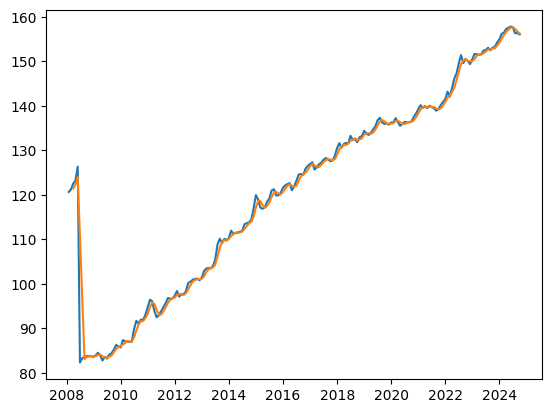

In [195]:
# Menghitung rolling mean dengan jendela 7
df['Rolling_Mean'] = df['IHK'].rolling(window=3).mean() ##
plt.plot(df.index,df['IHK'])
#plt.plot(df.index,df['Rolling_mean'])
plt.plot(df['Rolling_Mean'])

## setelah itu saya melakukan diffrencing data untuk melihat ke stasioneran suatu data tersebut

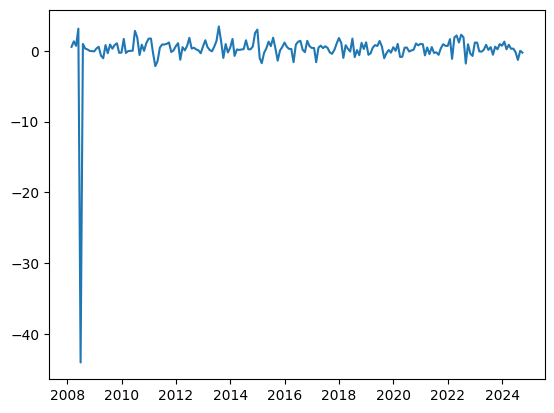

In [196]:
# Menghitung rolling mean dengan jendela 7
plt.plot(df['IHK'].diff())

## dapat dilihaT pada saat diffrencing satu kali data tersebut TERLIHAT stasioner maka untuk menguji lebih lanjut kita akan lihat kestasioneran data tersebut
$$
Y_t = Y_t - Y_t-1
$$

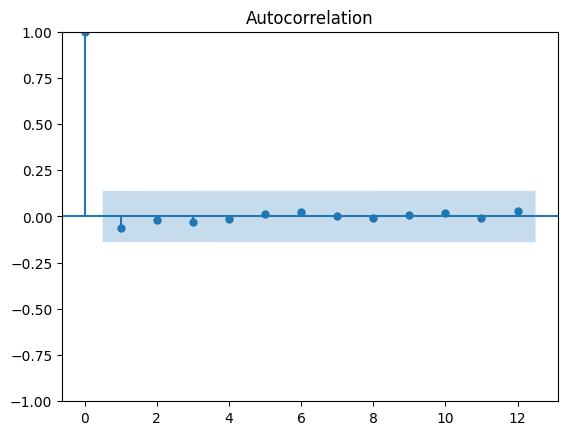

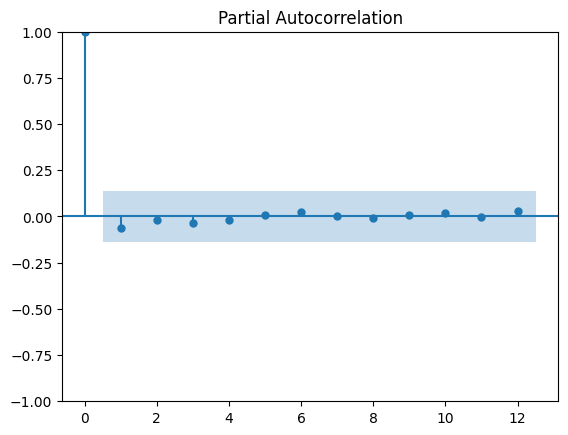

In [197]:
# Menggambarkan ACF dan PACF untuk menentukan parameter
plot_acf(df['IHK'].diff().dropna(), lags=12)
plot_pacf(df['IHK'].diff().dropna(), lags=12)
plt.show()

Mean Absolute Error (Mape) pada data pengujian: 0.01247717250946273


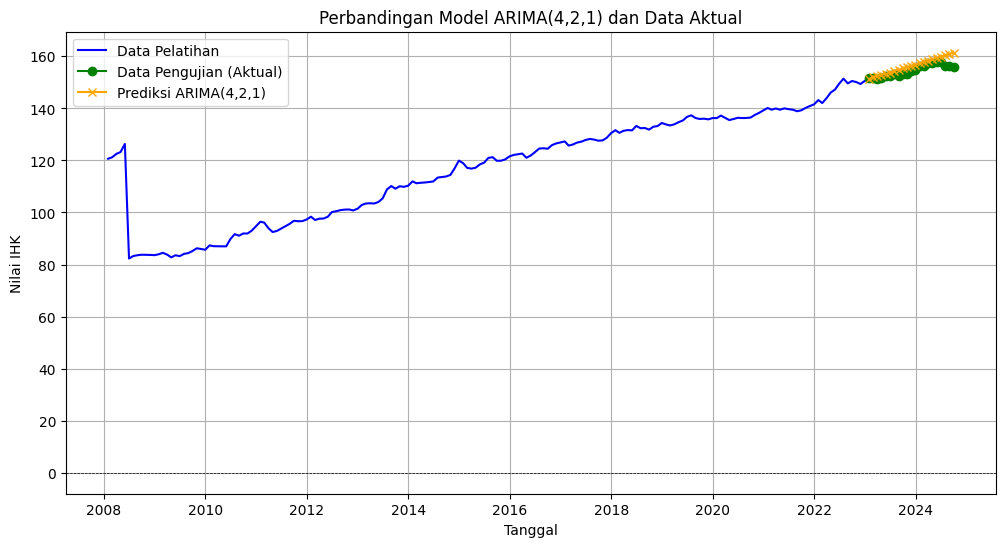

In [292]:
# Memisahkan data menjadi 80% pelatihan dan 20% pengujian

from sklearn.metrics import mean_absolute_percentage_error
train_size = int(len(df) * 0.9)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit model IMA(1,1) pada data pelatihan
model = ARIMA(train['IHK'], order=(4, 2, 1))
model_fit = model.fit()

# Melakukan prediksi untuk periode pengujian
n_forecast = len(test)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean

# # Menampilkan hasil prediksi
# print("Prediksi IHK:")
# print(forecast_values)

#Menghitung error (MAE) pada data pengujian
mape = mean_absolute_percentage_error(test['IHK'], forecast_values)

print(f'Mean Absolute Error (Mape) pada data pengujian: {mape}')

#Plot hasil
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['IHK'], label='Data Pelatihan', color='blue')
plt.plot(test.index, test['IHK'], label='Data Pengujian (Aktual)', color='green', marker='o')
plt.plot(test.index, forecast_values, label='Prediksi ARIMA(4,2,1)', color='orange', marker='x')
plt.title('Perbandingan Model ARIMA(4,2,1) dan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Nilai IHK')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

In [285]:
# Fit model IMA(1,1)
model = ARIMA(df['IHK'], order=(4, 2, 1))
model_fit = model.fit()

# Tampilkan ringkasan model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    IHK   No. Observations:                  201
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -518.263
Date:                Mon, 28 Oct 2024   AIC                           1048.525
Time:                        13:19:23   BIC                           1068.285
Sample:                    01-31-2008   HQIC                          1056.522
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2611      0.046     -5.654      0.000      -0.352      -0.171
ar.L2         -0.2286      0.052     -4.433      0.000      -0.330      -0.128
ar.L3         -0.2410      0.071     -3.380      0.0

In [286]:
#Fit model IMA(1,1)
model = ARIMA(df['IHK'], order=(4, 2, 1))
model_fit = model.fit()

# Menghitung prediksi
n_forecast = 4
forecast = model_fit.get_forecast(steps=n_forecast)

# Mengambil nilai prediksi
forecast_values = forecast.predicted_mean

# Menampilkan hasil prediksi
forecast_values

2024-10-31    156.658247
2024-11-30    157.026557
2024-12-31    157.022041
2025-01-31    157.017093
Freq: ME, Name: predicted_mean, dtype: float64

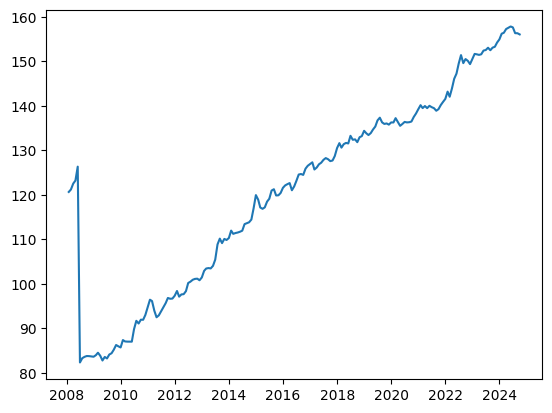

In [290]:
plt.plot(df['IHK'])

C:\Users\BPSAdmin\AppData\Local\Temp\ipykernel_13556\840779889.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time = pd.date_range(start='2008-01-01', periods=n, freq='M')


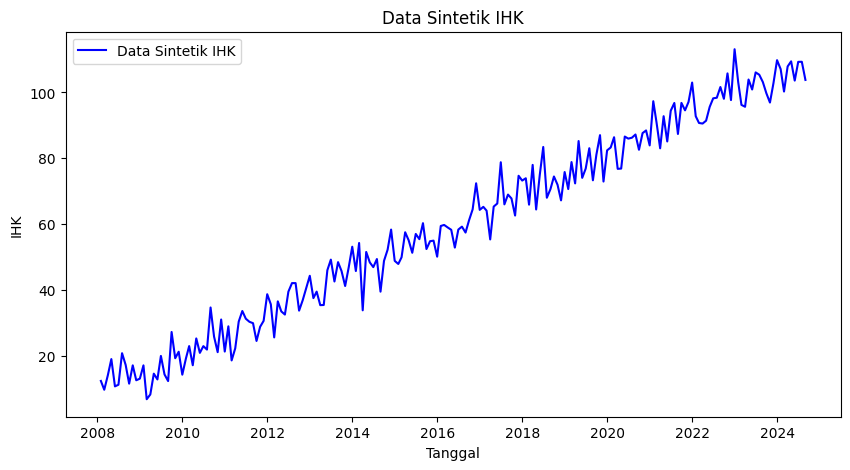

In [300]:
# 1. Membuat Data Sintetik
np.random.seed(42)
n = 200  # Jumlah data
time = pd.date_range(start='2008-01-01', periods=n, freq='M')
# Membuat data IHK dengan trend dan noise
data = 10 + 0.5 * np.arange(n) + np.random.normal(scale=5, size=n)  # Trend + Noise

# Membuat DataFrame
df = pd.DataFrame(data, index=time, columns=['IHK'])

# 2. Melihat Data
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['IHK'], label='Data Sintetik IHK', color='blue')
plt.title('Data Sintetik IHK')
plt.xlabel('Tanggal')
plt.ylabel('IHK')
plt.legend()
plt.show()




C:\Users\BPSAdmin\AppData\Local\Temp\ipykernel_13556\1079910032.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time = pd.date_range(start='2008-01-01', periods=n, freq='M')


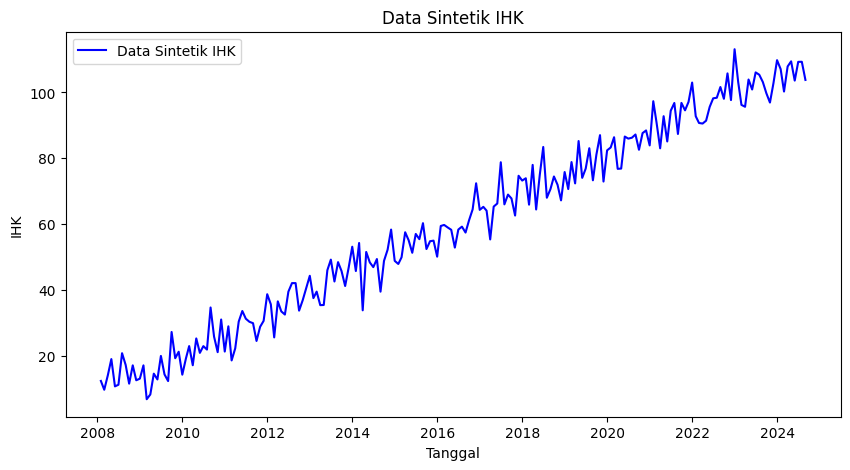

Mean Absolute Percentage Error (MAPE) pada data pengujian: 0.06808155110968514


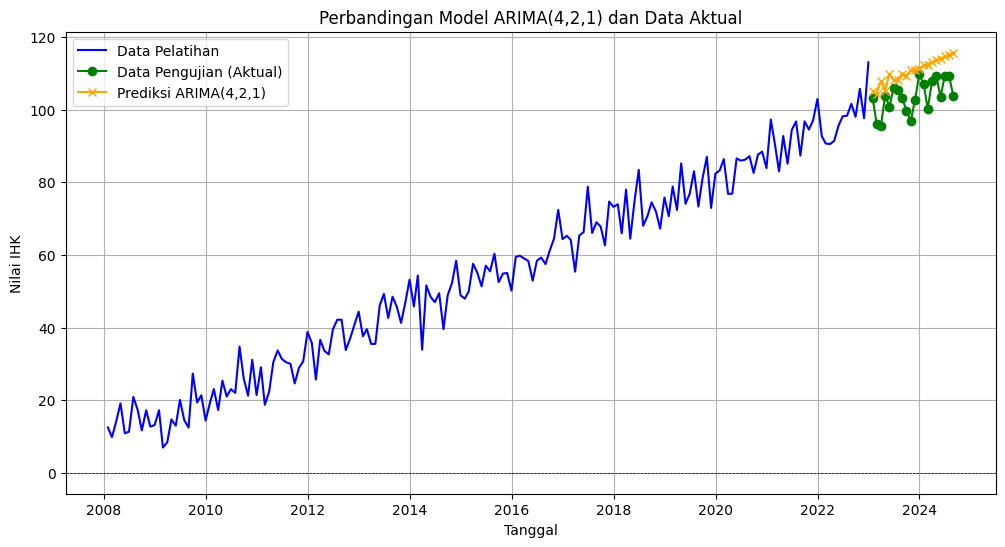

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# 1. Membuat Data Sintetik
np.random.seed(42)
n = 200  # Jumlah data
time = pd.date_range(start='2008-01-01', periods=n, freq='M')
data = 10 + 0.5 * np.arange(n) + np.random.normal(scale=5, size=n)  # Trend + Noise

# Membuat DataFrame
df = pd.DataFrame(data, index=time, columns=['IHK'])

# 2. Melihat Data
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['IHK'], label='Data Sintetik IHK', color='blue')
plt.title('Data Sintetik IHK')
plt.xlabel('Tanggal')
plt.ylabel('IHK')
plt.legend()
plt.show()

# Memisahkan data menjadi 90% pelatihan dan 10% pengujian
train_size = int(len(df) * 0.9)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit model ARIMA(4, 2, 1) pada data pelatihan
model = ARIMA(train['IHK'], order=(4, 2, 1))
model_fit = model.fit()

# Melakukan prediksi untuk periode pengujian
n_forecast = len(test)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean

# Menghitung error (MAPE) pada data pengujian
mape = mean_absolute_percentage_error(test['IHK'], forecast_values)

print(f'Mean Absolute Percentage Error (MAPE) pada data pengujian: {mape}')

# Plot hasil
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['IHK'], label='Data Pelatihan', color='blue')
plt.plot(test.index, test['IHK'], label='Data Pengujian (Aktual)', color='green', marker='o')
plt.plot(test.index, forecast_values, label='Prediksi ARIMA(4,2,1)', color='orange', marker='x')
plt.title('Perbandingan Model ARIMA(4,2,1) dan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Nilai IHK')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()
